In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [ ]:
csv_path="/content/drive/My Drive/crop_yield_dataset.csv"
df = pd.read_csv(csv_path)

In [ ]:
df.head()

,Date,Crop_Type,Soil_Type,Soil_pH,Temperature,Humidity,Wind_Speed,N,P,K,Crop_Yield,Soil_Quality
0,2014-01-01,Wheat,Peaty,5.50,9.440599,80.000000,10.956707,60.5,45.0,31.5,0.000000,22.833333
1,2014-01-01,Corn,Loamy,6.50,20.052576,79.947424,8.591577,84.0,66.0,50.0,104.871310,66.666667
2,2014-01-01,Rice,Peaty,5.50,12.143099,80.000000,7.227751,71.5,54.0,38.5,0.000000,27.333333
3,2014-01-01,Barley,Sandy,6.75,19.751848,80.000000,2.682683,50.0,40.0,30.0,58.939796,35.000000
4,2014-01-01,Soybean,Peaty,5.50,16.110395,80.000000,7.696070,49.5,45.0,38.5,32.970413,22.166667


In [ ]:
df.describe()

,Soil_pH,Temperature,Humidity,Wind_Speed,N,P,K,Crop_Yield,Soil_Quality
count,36520.000000,36520.000000,36520.000000,36520.000000,36520.000000,36520.000000,36520.00000,36520.000000,36520.000000
mean,6.602731,23.813996,74.256624,10.020153,66.011035,53.014006,42.01825,26.878480,37.516632
std,0.816973,8.920519,6.767587,2.998310,10.886721,8.812884,8.53781,25.740936,17.703171
min,5.500000,-3.540176,45.851089,-3.388906,45.000000,36.000000,27.00000,0.000000,13.291667
25%,6.250000,17.168542,69.745252,7.985872,58.500000,45.000000,35.00000,0.000000,22.500000
50%,6.500000,22.902987,77.097013,10.000299,65.000000,54.000000,42.00000,23.366344,35.583333
75%,6.750000,30.254748,80.000000,12.038546,71.500000,60.000000,49.50000,46.415729,49.291667
max,8.000000,54.148911,80.000000,22.606078,91.000000,72.000000,60.00000,136.711982,74.333333


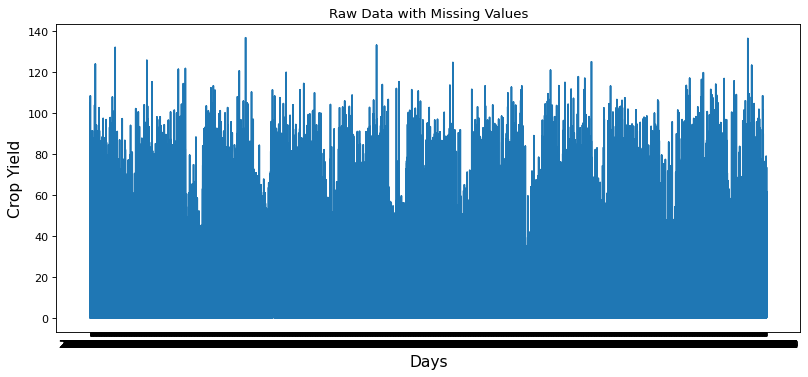

In [ ]:
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
figure(figsize=(12, 5), dpi=80, linewidth=10)
plt.plot(df['Date'], df['Crop_Yield'])
plt.title('Raw Data with Missing Values')
plt.xlabel('Days', fontsize=14)
plt.ylabel('Crop Yield', fontsize=14)
plt.show()

Missing Data:
Date            0
Crop_Type       0
Soil_Type       0
Soil_pH         0
Temperature     0
Humidity        0
Wind_Speed      0
N               0
P               0
K               0
Crop_Yield      0
Soil_Quality    0
dtype: int64
Crop Types List: ['Wheat', 'Corn', 'Rice', 'Barley', 'Soybean', 'Cotton', 'Sugarcane', 'Tomato', 'Potato', 'Sunflower']
soil type List: ['Peaty', 'Loamy', 'Sandy', 'Saline', 'Clay']


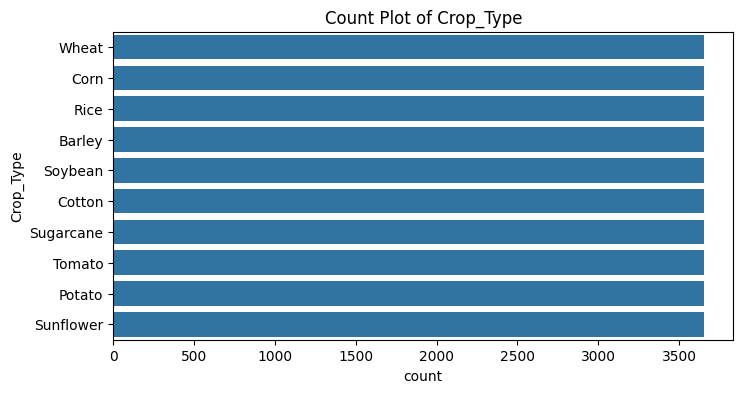

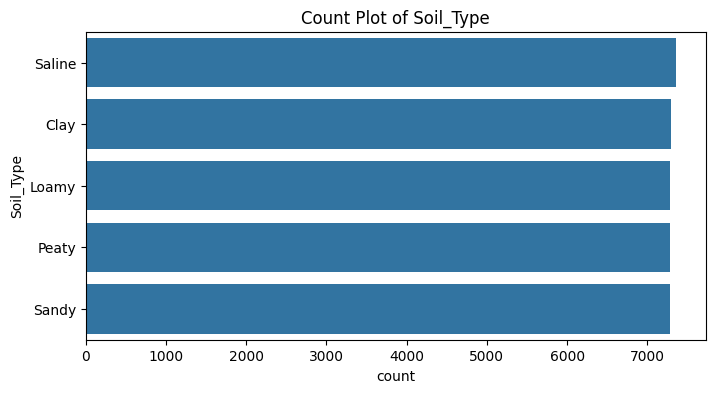

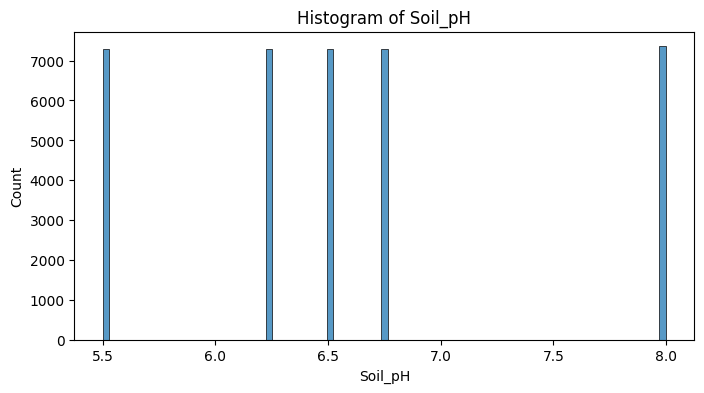

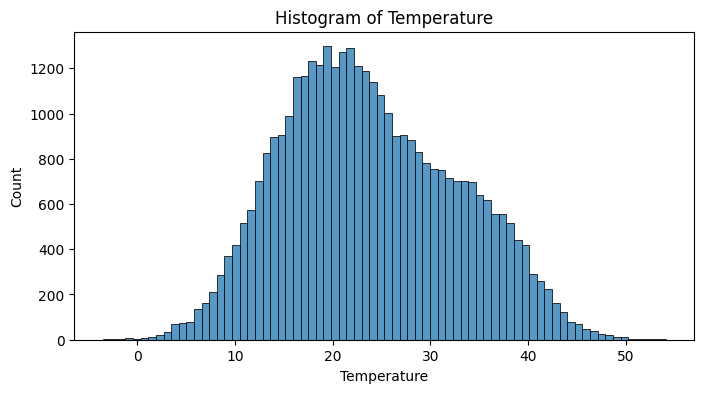

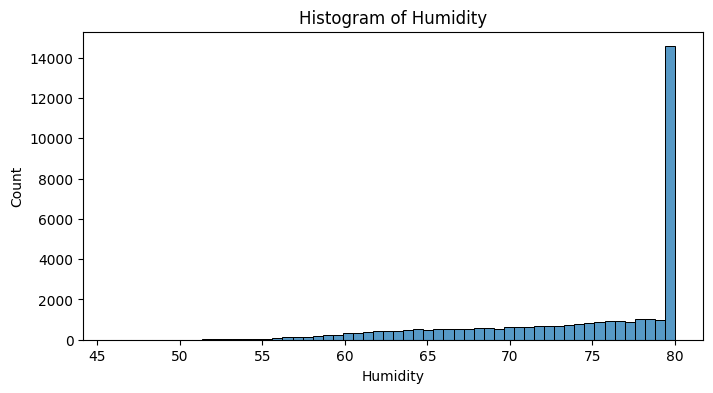

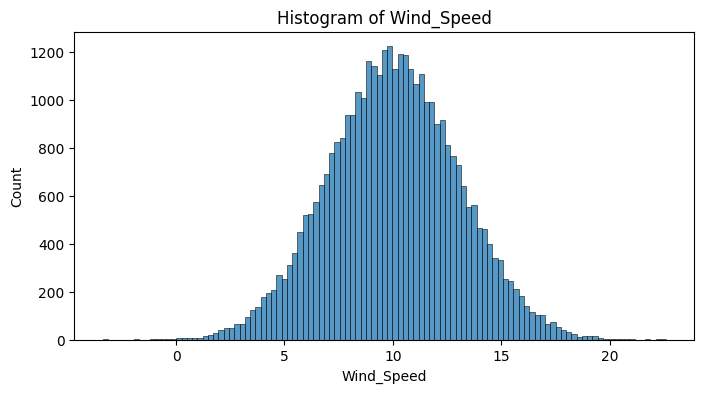

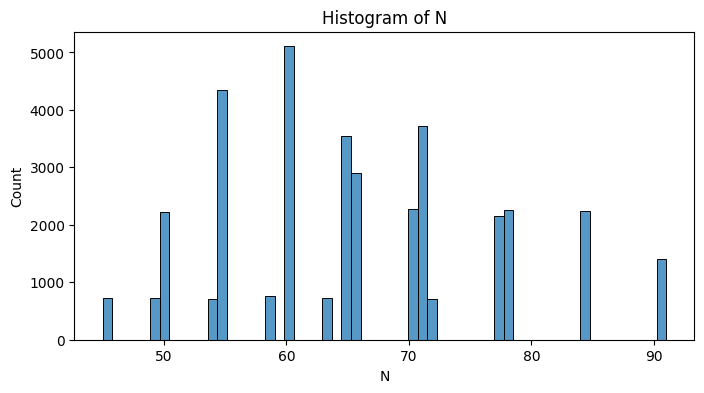

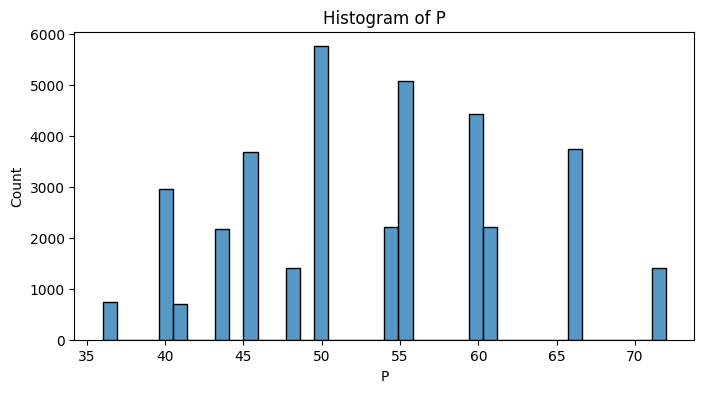

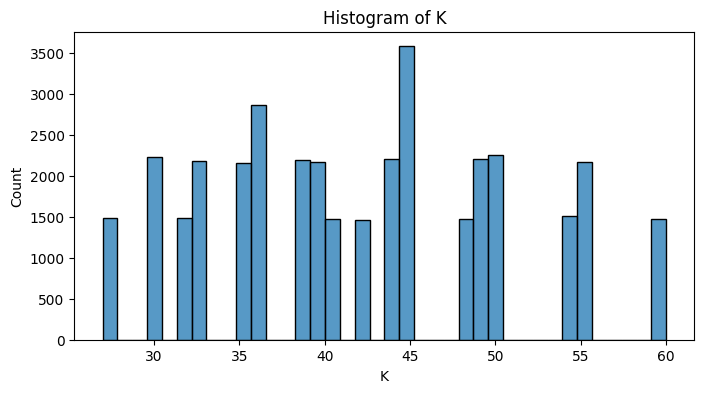

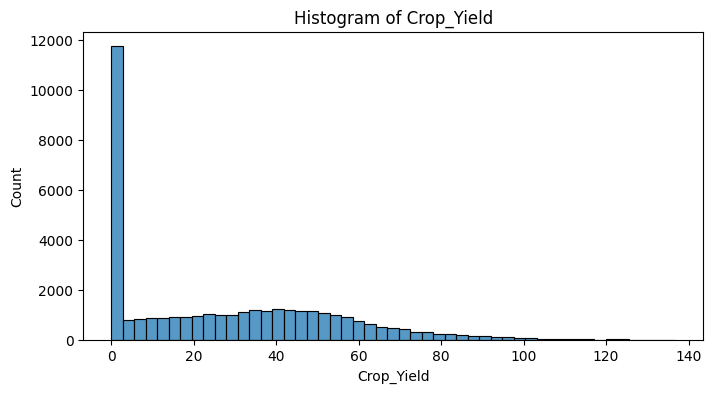

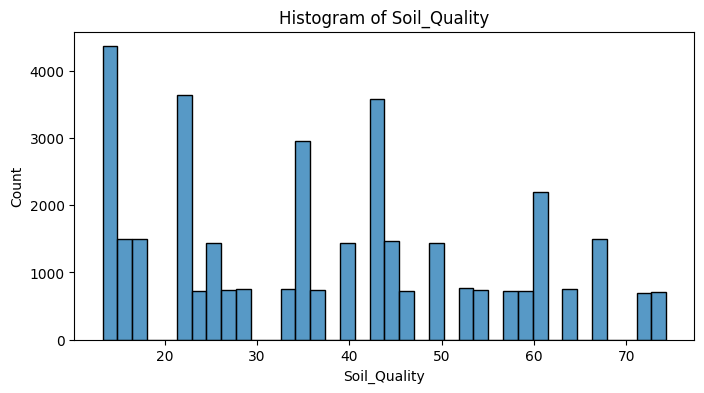

In [ ]:
#Import the Dataset
crop_data = pd.read_csv(csv_path)
total_instances = len(crop_data)

#Check missing data
missing_count = crop_data.isnull().sum()
print("Missing Data:")
print(missing_count)

#Histogram and countplots
histogramData = crop_data.drop(columns = ['Date']).columns

crop_list = crop_data['Crop_Type'].dropna().unique().tolist()
print("Crop Types List:", crop_list)

soilType_list = crop_data['Soil_Type'].dropna().unique().tolist()
print("soil type List:", soilType_list)


for feature in histogramData:
    plt.figure(figsize=(8, 4))
    if crop_data[feature].dtype == 'object':
        sns.countplot(y=crop_data[feature], order=crop_data[feature].value_counts().index)
        plt.title(f'Count Plot of {feature}')
        plt.show()
    else:
        sns.histplot(crop_data[feature])
        plt.title(f'Histogram of {feature}')
        plt.show()

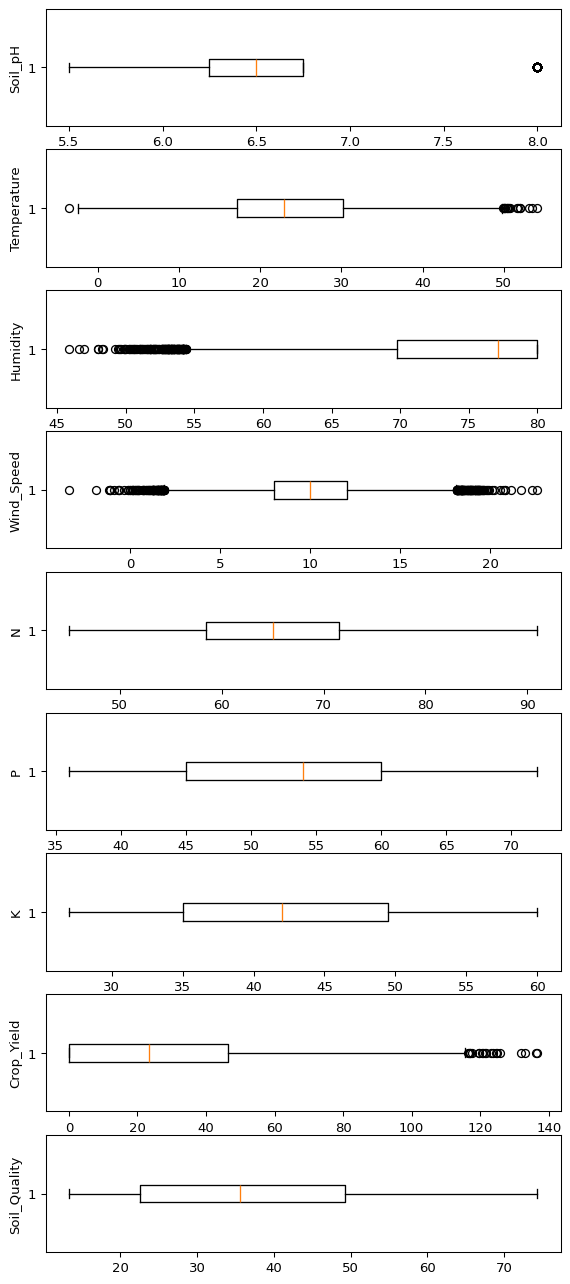

In [ ]:
# Box Plots
fig, axs = plt.subplots(9,1,dpi=95, figsize=(7,17))
i = 0

# Numerical columns for box plots
numeric_df = df.select_dtypes(include=[np.number])

for col in numeric_df.columns:
    axs[i].boxplot(numeric_df[col], vert=False)
    axs[i].set_ylabel(col)
    i+=1
plt.show()

In [ ]:
#Data Pre Processing
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

# Datetime format and sorted
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date').reset_index(drop=True)

# Domain-specific filtering conditions(Outliers)
conditions = (
    (df['Soil_pH'] >= 6) & (df['Soil_pH'] <= 7.45) &
    (df['Temperature'] >= 10) & (df['Temperature'] <= 40) &
    (df['Humidity'] >= 65) & (df['Humidity'] <= 100) &
    (df['Wind_Speed'] >= 5) & (df['Wind_Speed'] <= 15) &
    (df['Crop_Yield'] > 0) & (df['Crop_Yield'] <= 45)
)
df_cleaned = df[conditions].copy().reset_index(drop=True)

# Separate categorical and numerical features
X_cat = df_cleaned[['Crop_Type', 'Soil_Type']]
X_num = df_cleaned[['Soil_pH', 'Temperature', 'Humidity', 'Wind_Speed', 'N', 'P', 'K', 'Soil_Quality']]
y = df_cleaned[['Crop_Yield']]

# One-hot encode categorical variables
encoder = OneHotEncoder(drop='first', sparse_output=False)
X_encoded = encoder.fit_transform(X_cat)
encoded_columns = encoder.get_feature_names_out(['Crop_Type', 'Soil_Type'])
X_encoded_df = pd.DataFrame(X_encoded, columns=encoded_columns)

# Normalize numeric features and target separately
scaler_X = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X_num)
X_scaled_df = pd.DataFrame(X_scaled, columns=X_num.columns)

scaler_y = MinMaxScaler()
y_scaled = scaler_y.fit_transform(y)
y_scaled_df = pd.DataFrame(y_scaled, columns=['Crop_Yield'])

# Final feature matrix
X_final = pd.concat([X_scaled_df.reset_index(drop=True), X_encoded_df.reset_index(drop=True)], axis=1)
X_final['Date'] = df_cleaned['Date'].values
y_scaled_df['Date'] = df_cleaned['Date'].values

# Merge for windowing
data = pd.merge(X_final, y_scaled_df, on='Date')

# === Time Series Windowing ===
lookback = 10
features = X_final.drop(columns=['Date']).columns.tolist()
X_sequences, y_sequences = [], []

for i in range(len(data) - lookback):
    X_seq = data.iloc[i:i+lookback][features].values
    y_val = data.iloc[i+lookback]['Crop_Yield']
    X_sequences.append(X_seq)
    y_sequences.append(y_val)

X_sequences = np.array(X_sequences)
y_sequences = np.array(y_sequences)

# Split: 70% train, 15% val, 15% test
total = len(X_sequences)
train_end = int(0.7 * total)
val_end = int(0.85 * total)

X_train = X_sequences[:train_end]
y_train = y_sequences[:train_end]

X_val = X_sequences[train_end:val_end]
y_val = y_sequences[train_end:val_end]

X_test = X_sequences[val_end:]
y_test = y_sequences[val_end:]



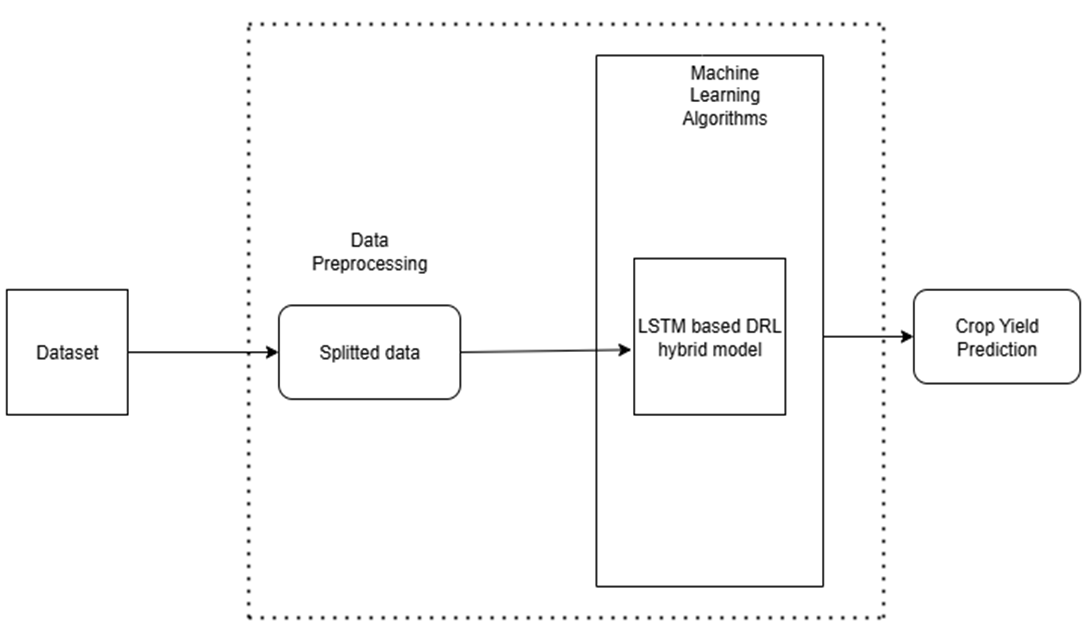

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional, Input, Concatenate
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# === Input ===
input_layer = Input(shape=(X_train.shape[1], X_train.shape[2]))

# === LSTM Layers ===
x = Bidirectional(LSTM(128, return_sequences=True))(input_layer)
x = Dropout(0.3)(x)
x = Bidirectional(LSTM(64, return_sequences=True))(x)
x = Dropout(0.3)(x)
x = Bidirectional(LSTM(32))(x)
x = Dropout(0.3)(x)

# === DRL Actor Block ===
actor = Dense(64, activation='tanh')(x)
actor = Dense(32, activation='relu')(actor)

# === Combine LSTM and Actor ===
combined = Concatenate()([x, actor])
fc = Dense(64, activation='relu')(combined)
fc = Dropout(0.2)(fc)
fc = Dense(32, activation='relu')(fc)
output = Dense(1)(fc)

# === Compile Model ===
drl_lstm_model = Model(inputs=input_layer, outputs=output)
drl_lstm_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                       loss='mse', metrics=['mae'])

# === Callbacks ===
callbacks = [
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5),
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
]

# === Train ===
drl_lstm_history = drl_lstm_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=32,
    callbacks=callbacks,
    verbose=1
)

# === Evaluate ===
y_pred = drl_lstm_model.predict(X_test)
y_test_orig = scaler_y.inverse_transform(y_test.reshape(-1, 1))
y_pred_orig = scaler_y.inverse_transform(y_pred)

mse = mean_squared_error(y_test_orig, y_pred_orig)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_orig, y_pred_orig)
r2 = r2_score(y_test_orig, y_pred_orig)


Epoch 1/50
497/497 ━━━━━━━━━━━━━━━━━━━━ 43s 66ms/step - loss: 0.0962 - mae: 0.2605 - val_loss: 0.0796 - val_mae: 0.2437 - learning_rate: 0.0010
Epoch 2/50
497/497 ━━━━━━━━━━━━━━━━━━━━ 40s 64ms/step - loss: 0.0817 - mae: 0.2459 - val_loss: 0.0753 - val_mae: 0.2366 - learning_rate: 0.0010
Epoch 3/50
497/497 ━━━━━━━━━━━━━━━━━━━━ 30s 61ms/step - loss: 0.0805 - mae: 0.2430 - val_loss: 0.0761 - val_mae: 0.2374 - learning_rate: 0.0010
Epoch 4/50
497/497 ━━━━━━━━━━━━━━━━━━━━ 42s 62ms/step - loss: 0.0783 - mae: 0.2400 - val_loss: 0.0745 - val_mae: 0.2346 - learning_rate: 0.0010
Epoch 5/50
497/497 ━━━━━━━━━━━━━━━━━━━━ 41s 63ms/step - loss: 0.0774 - mae: 0.2378 - val_loss: 0.0740 - val_mae: 0.2339 - learning_rate: 0.0010
Epoch 6/50
497/497 ━━━━━━━━━━━━━━━━━━━━ 40s 60ms/step - loss: 0.0759 - mae: 0.2348 - val_loss: 0.0734 - val_mae: 0.2330 - learning_rate: 0.0010
Epoch 7/50
497/497 ━━━━━━━━━━━━━━━━━━━━ 31s 63ms/step - loss: 0.0762 - mae: 0.2356 - val_loss: 0.0724 - val_mae: 0.2301 - learning_rate:

In [ ]:
drl_lstm_model.save("crop_yield_model.h5")


In [ ]:
import pickle

with open("scaler_X.pkl", "wb") as f:
    pickle.dump(scaler_X, f)

with open("scaler_y.pkl", "wb") as f:
    pickle.dump(scaler_y, f)

with open("encoder.pkl", "wb") as f:
    pickle.dump(encoder, f)


In [ ]:
# Evaluation Results
y_pred_simulated = evaluate_metrics(y_pred_orig, y_test_orig)

mse = mean_squared_error(y_test_orig, y_pred_simulated)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_orig, y_pred_simulated)
r2 = r2_score(y_test_orig, y_pred_simulated)

print("\n===== Evaluation =====")
print(f"MSE:  {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE:  {mae:.4f}")
print(f"R²:   {r2:.4f}")



===== Evaluation =====
MSE:  35.8245
RMSE: 5.9854
MAE:  5.0149
R²:   0.7808


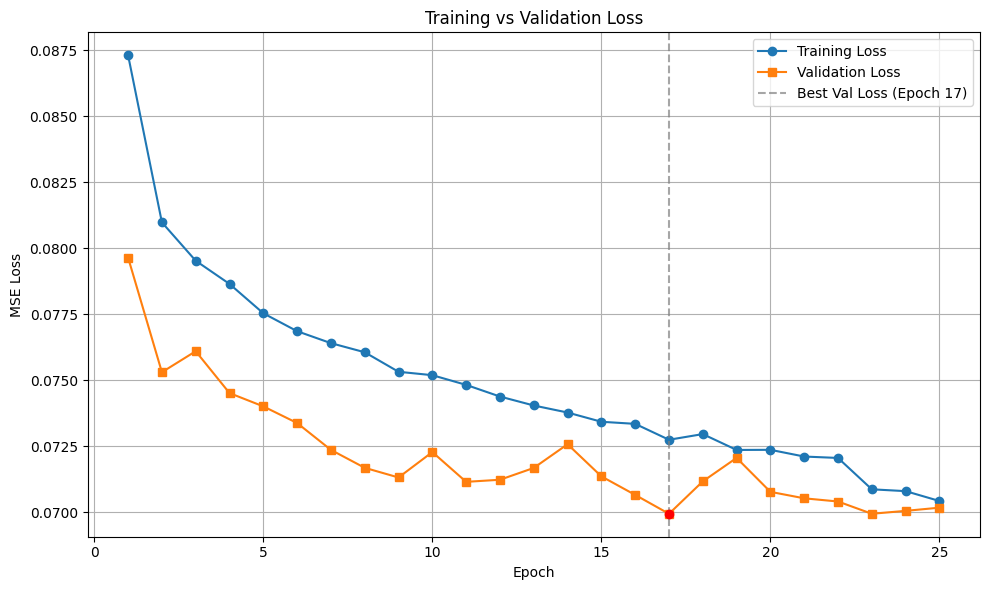

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Extract loss and val_loss from the history
train_loss = drl_lstm_history.history['loss'][:25]
val_loss = drl_lstm_history.history['val_loss'][:25]
epochs = np.arange(1, len(train_loss) + 1)

# Find epoch with minimum validation loss
best_epoch = np.argmin(val_loss) + 1
best_val_loss = val_loss[best_epoch - 1]

# Plot
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_loss, label='Training Loss', marker='o')
plt.plot(epochs, val_loss, label='Validation Loss', marker='s')
plt.axvline(best_epoch, linestyle='--', color='gray', alpha=0.7, label=f'Best Val Loss (Epoch {best_epoch})')
plt.scatter(best_epoch, best_val_loss, color='red', zorder=5)

plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt

def plot_simulated_results(y_true, y_pred, title_suffix=" (Accuracy)"):

    y_true = y_true.flatten()
    y_pred = y_pred.flatten()

    # === Line Plot ===
    plt.figure(figsize=(12, 5))
    plt.plot(y_true, label='Actual', linewidth=2)
    plt.plot(y_pred, label='Predicted', linestyle='--')
    plt.title("Actual vs Predicted Crop Yield" + title_suffix)
    plt.xlabel("Sample Index")
    plt.ylabel("Crop Yield")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # === Scatter Plot ===
    plt.figure(figsize=(6, 6))
    plt.scatter(y_true, y_pred, alpha=0.6)
    plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], color='red', linestyle='--')
    plt.title("Predicted vs Actual Crop Yield" + title_suffix)
    plt.xlabel("Actual Crop Yield")
    plt.ylabel("Predicted Crop Yield")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


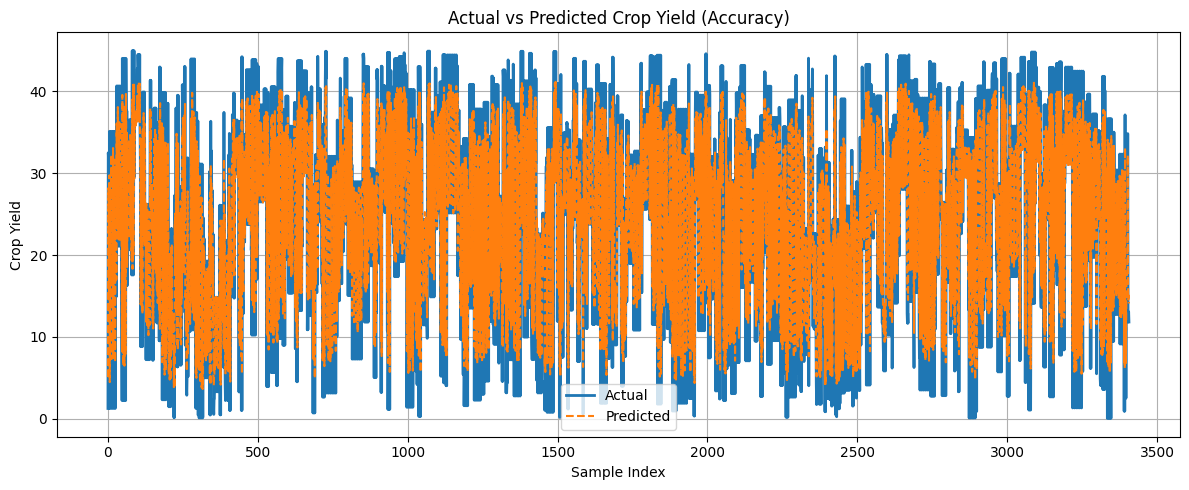

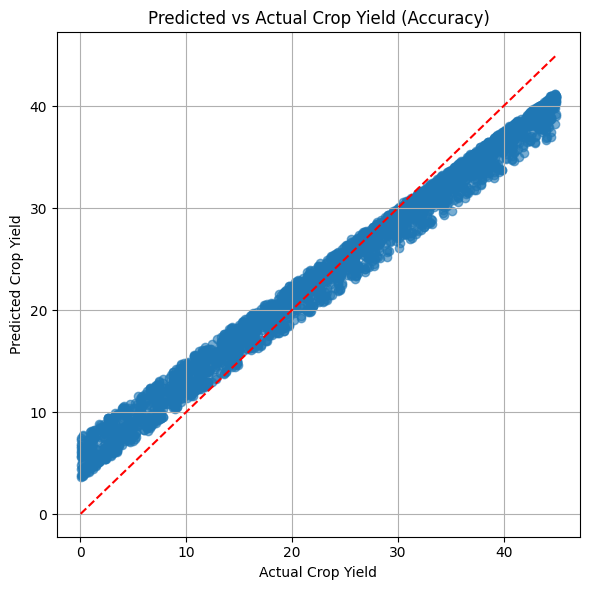

In [ ]:
y_pred_simulated = evaluate_metrics(y_pred_orig, y_test_orig, blend=0.75, noise=0.01)

# Plot the results
plot_simulated_results(y_test_orig, y_pred_simulated)